# Defining schemes and xalpha values: 

In [1]:
scheme = {1: "MS_Bar", 2: "geometric", 3: "Alpha_n, n=2"}
xalpha = {1: "Alpha_MS_Bar", 2: "Alpha_g", 3: "Alpha_2"}

# Defining SUNc color factors:

In [2]:
import sympy as sp


def CA(Nc):
    return Nc

def CF(Nc):
    return (Nc**2 - 1) / (2 * Nc)

def dAdA(Nc,NA):
    return Nc**2 * (Nc**2 + 36) * NA / 24

def dFdA(Nc,NA):
    return Nc * (Nc**2 + 6) * NA / 48

def dFdF(Nc,NA):
    return (Nc**4 - 6 * Nc**2 + 18) * NA / (96 * Nc**2)

def dAA(Nc):
    return dAdA(Nc,1)

def dFA(Nc):
    return dFdA(Nc,1)

def dFF(Nc):
    return dFdF(Nc,1)

Tf = 1/2


# Defining beta functions:

In [3]:
import numpy as np
import scipy.special as spl

Pi = np.pi


#The 2 first/scheme-independent

def beta0(Nc,Nf):
    beta0 = (1 / (4 * Pi)) * (11/3 * CA(Nc) - 2/3 * Nf)
    return beta0

def beta1(Nc,Nf):
    beta1 = (1 / (4 * Pi))**2 * (34/3 * CA(Nc)**2 - 10/3 * CA(Nc) * Nf - 2 * CF(Nc) * Nf)
    return beta1

In [4]:
b = beta1(3,5) / (2 * beta0(3,5)**2)
print(b)

0.3289224952741021


In [5]:
# Zeta function using scipy
def Zeta(s):
    return spl.zeta(s, 1)  # '1' is the q parameter, for Riemann Zeta it's set to 1

#Beta scheme-dependent: in the MS bar scheme here ?
def beta2(N,Nf):
    beta2 = (1 / (4 * Pi))**3 * (2857/54 * CA(N)**3 - 1415/27 * CA(N)**2 * Nf / 2 + 
         158/27 * CA(N) * Nf**2 / 4 + 44/9 * CF(N) * Nf**2 / 4 - 
         205/9 * CF(N) * CA(N) * Nf / 2 + CF(N)**2 * Nf)
    return beta2

def beta3(N,Nf):
    beta3 = (1 / (4 * Pi))**4 * (CA(N) * CF(N) * Nf**2 / 4 * (17152/243 + 448/9 * Zeta(3)) + 
         CA(N) * CF(N)**2 * Nf / 2 * (-4204/27 + 352/9 * Zeta(3)) + 
         424/243 * CA(N) * Nf**3 / 8 + 1232/243 * CF(N) * Nf**3 / 8 + 
         CA(N)**2 * CF(N) * Nf / 2 * (7073/243 - 656/9 * Zeta(3)) + 
         CA(N)**2 * Nf**2 / 4 * (7930/81 + 224/9 * Zeta(3)) + 
         CA(N)**3 * Nf / 2 * (-39143/81 + 136/3 * Zeta(3)) + 
         CA(N)**4 * (150653/486 - 44/9 * Zeta(3)) + 
         CF(N)**2 * Nf**2 / 4 * (1352/27 - 704/9 * Zeta(3)) + 
         46 * CF(N)**3 * Nf / 2 + 
         Nf * dFA(N) * (512/9 - 1664/3 * Zeta(3)) + 
         Nf**2 * dFF(N) * (-704/9 + 512/3 * Zeta(3)) + 
         dAA(N) * (-80/9 + 704/3 * Zeta(3)))
    return beta3

# Defining the lmL function:

In [12]:
# Assuming Beta0, Beta1, Beta2, Beta3 are defined somewhere in your code
Beta0 = sp.Symbol('Beta0')  # Example definition
Beta1 = sp.Symbol('Beta1')  # Example definition
Beta2 = sp.Symbol('Beta2')  # Example definition
Beta3 = sp.Symbol('Beta3')  # Example definition


### MS bar fixed order scheme:

In [13]:
def lmL_MSbar(alpha):
    return (1/(2 * Beta0 * alpha) + 
            Beta1/Beta0 * sp.log(Beta0 * alpha) / (2 * Beta0) + 
            alpha * (Beta2/Beta0 - (Beta1/Beta0)**2) / (2 * Beta0) + 
            alpha**2 * (Beta3/Beta0 - (Beta1/Beta0)**3 - 
                        2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3)) / (4 * Beta0))


In [14]:
from sympy import symbols, log, simplify, series

# Define the symbols
Beta0, Beta1, Beta2, Beta3, alpha = symbols('Beta0 Beta1 Beta2 Beta3 alpha')

# Define the lmL function
def lmL_MSbar(alpha):
    term1 = 1 / (2 * Beta0 * alpha)
    term2 = (Beta1 / Beta0) * log(Beta0 * alpha) / (2 * Beta0)
    term3 = alpha * (Beta2 / Beta0 - (Beta1 / Beta0)**2) / (2 * Beta0)
    term4 = alpha**2 * (Beta3 / Beta0 - (Beta1 / Beta0)**3 - 
                        2 * ((Beta1 * Beta2) / (Beta0**2) - (Beta1 / Beta0)**3)) / (4 * Beta0)
    return term1 + term2 + term3 + term4

# Example usage of lmL
series(lmL_MSbar(alpha),alpha,0,3)

alpha**2*(Beta3/(4*Beta0**2) - Beta1*Beta2/(2*Beta0**3) + Beta1**3/(4*Beta0**4)) + alpha*(Beta2/(2*Beta0**2) - Beta1**2/(2*Beta0**3)) + 1/(2*Beta0*alpha) + Beta1*log(Beta0)/(2*Beta0**2) + Beta1*log(alpha)/(2*Beta0**2)

### Geometric scheme :

In [15]:
# Define the lmL function
def lmL_geo(alpha):
    term1 = 1 / (2 * Beta0 * alpha)
    term2 = (Beta1 / Beta0) * log(Beta0 * alpha) / (2 * Beta0)
    return term1 + term2

### Modified geometric scheme :

In [16]:
# Define the lmL function (alpha_n for n=2)
def lmL_mgeo(alpha):
    term1 = 1 / (2 * Beta0 * alpha)
    term2 = (Beta1 / Beta0) * log(Beta0 * alpha) / (2 * Beta0)
    term3 = (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * alpha / Beta0)**2
    return term1 + term2 - term3

### lmL :

In [17]:
def lmL(key, a):
    lmL = {
        1: lmL_MSbar(a),
        2: lmL_geo(a),
        3: lmL_mgeo(a)
        }
    return lmL.get(key, "Invalid key")

# Example usage
print('ln(mu) = ' , lmL(2, alpha))


ln(mu) =  1/(2*Beta0*alpha) + Beta1*log(Beta0*alpha)/(2*Beta0**2)


# Recover Beta function :

In [18]:
def betaFunc(key, a):
    return sp.simplify(1/sp.diff(lmL(key,a),a))

In [19]:
from sympy import symbols, diff, simplify

alpha = symbols('alpha')
# Assuming lmL is already defined as a function of alpha
# Define betaFunc as the derivative of lmL
def betaFunc(key , alpha):
    return simplify(1/diff(lmL(key , alpha), alpha))

# Use of the function
betaFunc_result = betaFunc(2 , alpha)
betaFunc_result

-2*Beta0**2*alpha**2/(Beta0 - Beta1*alpha)

###  Series Expansion and Coefficient Extraction:

In [20]:
from sympy import series

# Example of a series expansion of betaFunc around alpha = 0
betaFunc_series = series(betaFunc(2 , alpha), alpha, 0, 5)
# Extracting coefficients
coefficients = [betaFunc_series.coeff(alpha, n) for n in range(5)]

print(betaFunc_series , '\n' , coefficients)

-2*Beta1**2*alpha**4/Beta0 - 2*Beta1*alpha**3 - 2*Beta0*alpha**2 + O(alpha**5) 
 [0, 0, -2*Beta0, -2*Beta1, -2*Beta1**2/Beta0]


### Recover alpha (geometric only):

In [24]:
def alpha_geo(key , mu):
    
    return sp.solve(lmL(key , log(mu)) - lnMu , log(mu))
    #return sp.solve(lmL(key , log(mu)) - log(mu) , log(mu))
    #return sp.solve(lmL(key , log(mu)) - mu , log(mu))

mu , lnMu = symbols('mu log(\mu/\Lambda)')

print(alpha_geo(2 , mu))
alpha_geo(2 , mu)[0]

[exp((2*Beta0**2*log(\mu/\Lambda) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*log(\mu/\Lambda)/Beta1)/Beta1))/Beta1)/Beta0]


exp((2*Beta0**2*log(\mu/\Lambda) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*log(\mu/\Lambda)/Beta1)/Beta1))/Beta1)/Beta0

In [30]:
b = sp.symbols('b')

# Substitution rule: b = Beta1 / (2 * Beta0^2)
#substitution_rule = {Beta1 / (2 * Beta0**2): b}
substitution_rule = {Beta0**2: 1/b * 1/2 * Beta1}

# Apply the substitution
simplified_expression = alpha_geo(2 , mu)[0].subs(substitution_rule)

sp.simplify(simplified_expression)


exp((b*LambertW(-exp(-log(\mu/\Lambda)/b)/(2*b)) + log(\mu/\Lambda))/b)/Beta0

### Numerical method for recovering the alphas:

In [19]:
# Beta values
Beta0 = 0.6100939485189322
Beta1 = 0.24485952713564968
Beta2 = 0.09116471061282587
Beta3 = 0.19353607511601503

In [20]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Dynamic approach for choosing initial guesses based on the value of y
def dynamic_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3):
    x_values = []

    for y in y_values:
        # Adjusting the initial guess based on the magnitude of y
        x_initial_guess = y / 10  # Example of a dynamic initial guess

        func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
        x_solution, = fsolve(func, x_initial_guess)

        x_values.append(x_solution)

    return x_values

/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_4562/1695794164.py:3: RuntimeWarning: invalid value encountered in log
  return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \


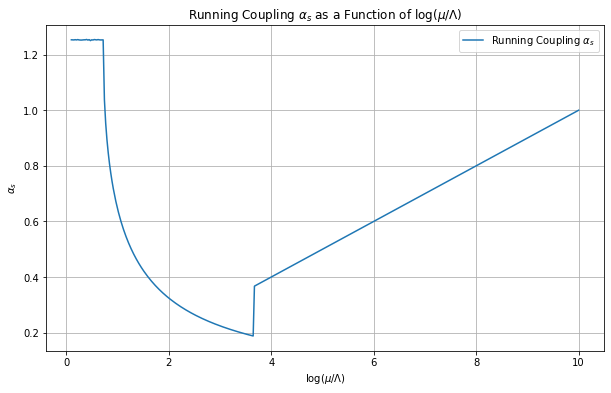

In [21]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \
           (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
           (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))

# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_1 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4562/1383270634.py:3: RuntimeWarning: invalid value encountered in log
  return 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0)


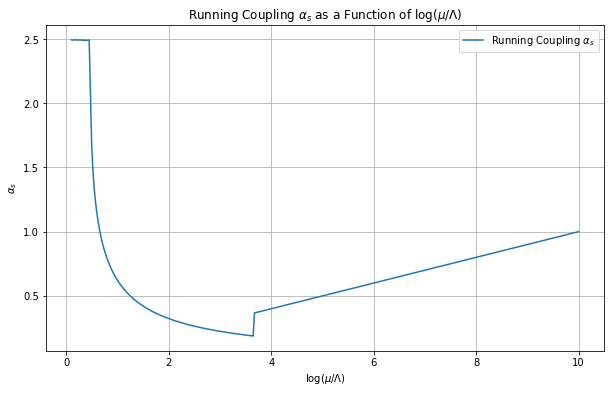

In [22]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0)
    
# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_2 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4562/2278376300.py:4: RuntimeWarning: invalid value encountered in log
  (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) - \


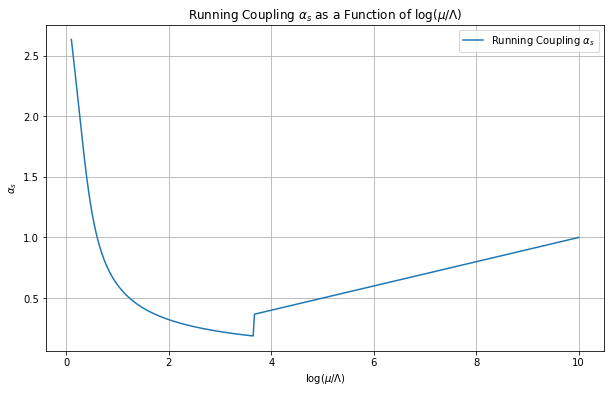

In [23]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) - \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_3 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


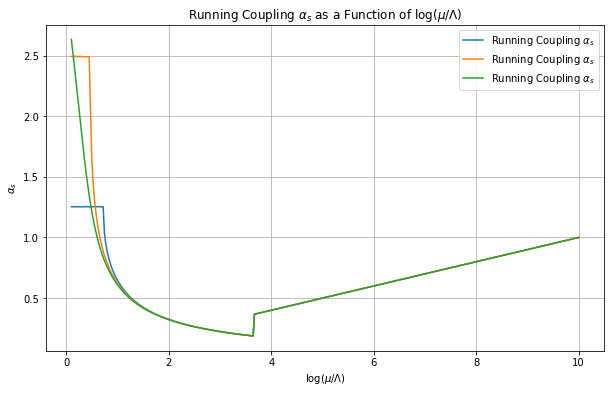

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.plot(log_mu_over_Lambda, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.plot(log_mu_over_Lambda, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print('',np.exp(3.5),'\n',np.exp(10))

 33.11545195869231 
 22026.465794806718


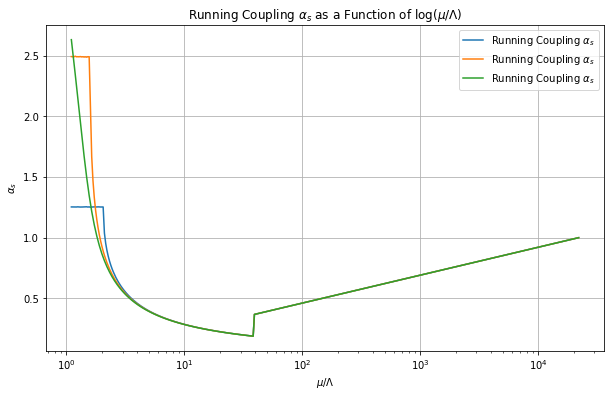

In [26]:
# Converting log(mu/Lambda) values back to mu/Lambda
mu_over_Lambda_values = np.exp(log_mu_over_Lambda)

plt.figure(figsize=(10, 6))
plt.plot(mu_over_Lambda_values, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.plot(mu_over_Lambda_values, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.plot(mu_over_Lambda_values, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xscale('log')  # Setting the x-axis to a logarithmic scale for better visualization
plt.xlabel("$\\mu/\\Lambda$")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
np_linspace_start = 0.1
np_linspace_end = 10

# Assign numerical values to Beta0 and Beta1
Beta0_val = beta0(3,3)
Beta1_val = beta1(3,3)
Beta2_val = beta2(3,3)
Beta3_val = beta3(3,3)

In [7]:
print('',Beta0_val,'\n',Beta1_val)

 0.716197243913529 
 0.40528473456935116


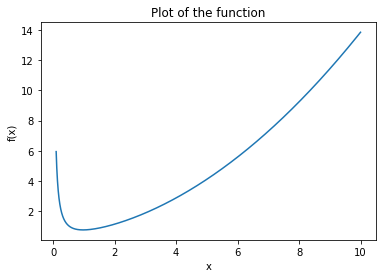

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_1
f = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * sp.log(Beta0 * x) + \
    (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))


# Lambdify the function for numerical evaluation
f_lambdified_1 = sp.lambdify(x, f.subs({Beta0: Beta0_val, Beta1: Beta1_val, Beta2: Beta2_val, \
                                        Beta3: Beta3_val}), 'numpy')

# Plot the function
x_vals = np.linspace(np_linspace_start, np_linspace_end, 4000)  # Avoid x = 0 due to division by zero
y_vals_1 = f_lambdified_1(x_vals)

plt.plot(x_vals, y_vals_1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.show()


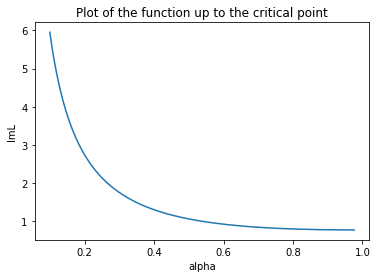

 0.9760089685359336 
 0.779182565225965


In [9]:
from scipy.optimize import fsolve

# Re-import sympy as sp
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols again
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_1 again with the correct Beta values
f = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * sp.log(Beta0 * x) + \
    (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))


# Substitute the Beta values
f_substituted = f.subs({Beta0: Beta0_val, Beta1: Beta1_val, Beta2: Beta2_val, \
                                        Beta3: Beta3_val})

# Compute the derivative of f
f_derivative = sp.diff(f_substituted, x)

# Lambdify the derivative for numerical evaluation
f_derivative_lambdified = sp.lambdify(x, f_derivative, 'numpy')

# Find critical points (where the derivative is zero)
initial_guess = 0.5  # Initial guess for the root finding
critical_point, = fsolve(f_derivative_lambdified, initial_guess)

# Lambdify the original function for plotting
f_lambdified = sp.lambdify(x, f_substituted, 'numpy')

# Plot the function up to the critical point
x_vals_restricted_1 = np.linspace(np_linspace_start, critical_point, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_1 = f_lambdified(x_vals_restricted_1)

plt.plot(x_vals_restricted_1, y_vals_restricted_1)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function up to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point,'\n',f_substituted.subs({x: critical_point}))

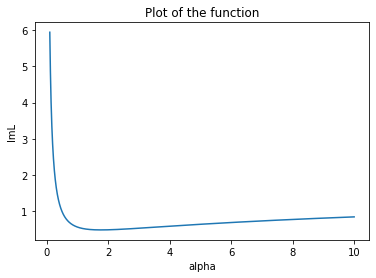

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')


# Define the function lmL_2
f = 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0)

# Lambdify the function for numerical evaluation
f_lambdified_2 = sp.lambdify(x, f.subs({Beta0: Beta0_val, Beta1: Beta1_val, Beta2: Beta2_val, \
                                        Beta3: Beta3_val}), 'numpy')

# Plot the function
x_vals = np.linspace(np_linspace_start, np_linspace_end, 4000)  # Avoid x = 0 due to division by zero
y_vals_2 = f_lambdified_2(x_vals)

plt.plot(x_vals, y_vals_2)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function')
plt.show()


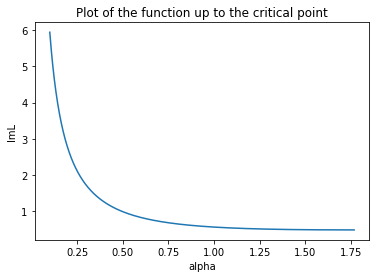

 1.7671458676442573 
 0.488124867679118


In [11]:
from scipy.optimize import fsolve

# Re-import sympy as sp
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols again
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_2 again with the correct Beta values
f = 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0)


# Substitute the Beta values
f_substituted = f.subs({Beta0: Beta0_val, Beta1: Beta1_val, Beta2: Beta2_val, \
                                        Beta3: Beta3_val})

# Compute the derivative of f
f_derivative = sp.diff(f_substituted, x)

# Lambdify the derivative for numerical evaluation
f_derivative_lambdified = sp.lambdify(x, f_derivative, 'numpy')

# Find critical points (where the derivative is zero)
initial_guess = 0.5  # Initial guess for the root finding
critical_point, = fsolve(f_derivative_lambdified, initial_guess)

# Lambdify the original function for plotting
f_lambdified = sp.lambdify(x, f_substituted, 'numpy')

# Plot the function up to the critical point
x_vals_restricted_2 = np.linspace(np_linspace_start, critical_point, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_2 = f_lambdified(x_vals_restricted_2)

plt.plot(x_vals_restricted_2, y_vals_restricted_2)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function up to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point,'\n',f_substituted.subs({x: critical_point}))

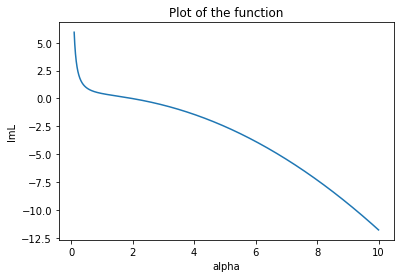

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_3
f = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0) - \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Lambdify the function for numerical evaluation
f_lambdified_3 = sp.lambdify(x, f.subs({Beta0: Beta0_val, Beta1: Beta1_val, Beta2: Beta2_val, \
                                        Beta3: Beta3_val}), 'numpy')

# Plot the function
x_vals = np.linspace(np_linspace_start, np_linspace_end, 4000)  # Avoid x = 0 due to division by zero
y_vals_3 = f_lambdified_3(x_vals)

plt.plot(x_vals, y_vals_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function')
plt.show()


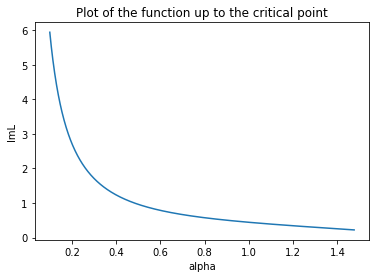

 1.4756095084330705 
 0.219486904498172


In [74]:
from scipy.optimize import fsolve

# Re-import sympy as sp
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols again
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_3 again with the correct Beta values
f = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0) - \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Substitute the Beta values
f_substituted = f.subs({Beta0: Beta0_val, Beta1: Beta1_val, Beta2: Beta2_val, \
                                        Beta3: Beta3_val})

# Compute the derivative of f
f_derivative = sp.diff(f_substituted, x)

# Lambdify the derivative for numerical evaluation
f_derivative_lambdified = sp.lambdify(x, f_derivative, 'numpy')

# Find critical points (where the derivative is zero)
initial_guess = 0.5  # Initial guess for the root finding
critical_point, = fsolve(f_derivative_lambdified, initial_guess)

# Lambdify the original function for plotting
f_lambdified = sp.lambdify(x, f_substituted, 'numpy')

# Plot the function up to the critical point
x_vals_restricted_3 = np.linspace(np_linspace_start, critical_point, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_3 = f_lambdified(x_vals_restricted_3)

plt.plot(x_vals_restricted_3, y_vals_restricted_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function up to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point,'\n',f_substituted.subs({x: critical_point}))

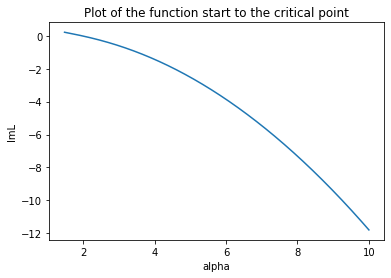

 1.4756095084330716 
 0.219486904498172


In [75]:
x_vals_restricted_bar_3 = np.linspace(critical_point, np_linspace_end, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_bar_3 = f_lambdified(x_vals_restricted_bar_3)

plt.plot(x_vals_restricted_bar_3, y_vals_restricted_bar_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function start to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point+1e-15,'\n',f_substituted.subs({x: critical_point+1e-15}))

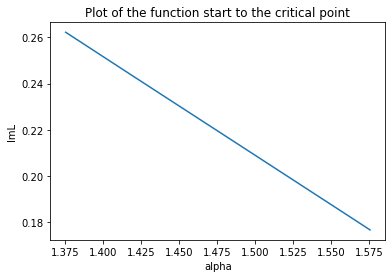

In [76]:
x_vals_restricted_bar_3 = np.linspace(critical_point-0.1, critical_point+0.1, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_bar_3 = f_lambdified(x_vals_restricted_bar_3)

plt.plot(x_vals_restricted_bar_3, y_vals_restricted_bar_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function start to the critical point')
plt.show()

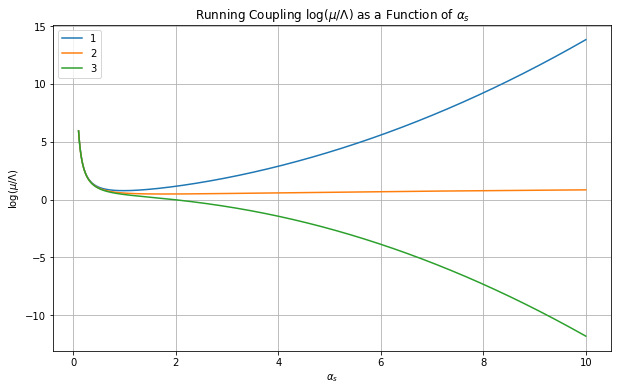

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_1, label='1')
plt.plot(x_vals, y_vals_2, label='2')
plt.plot(x_vals, y_vals_3, label='3')
plt.ylabel("log($\\mu/\\Lambda$)")
plt.xlabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


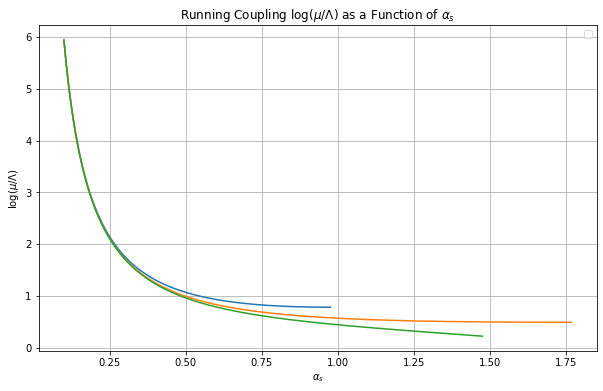

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals_restricted_1, y_vals_restricted_1)
plt.plot(x_vals_restricted_2, y_vals_restricted_2)
plt.plot(x_vals_restricted_3, y_vals_restricted_3)
plt.ylabel("log($\\mu/\\Lambda$)")
plt.xlabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

### Graphicaly inverse:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


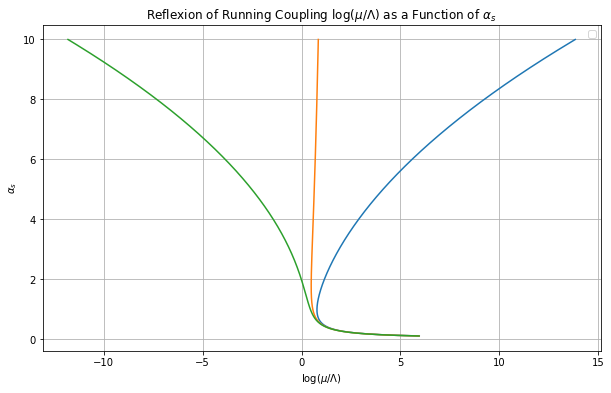

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_vals_1, x_vals)
plt.plot(y_vals_2, x_vals)
plt.plot(y_vals_3, x_vals)
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Reflexion of Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


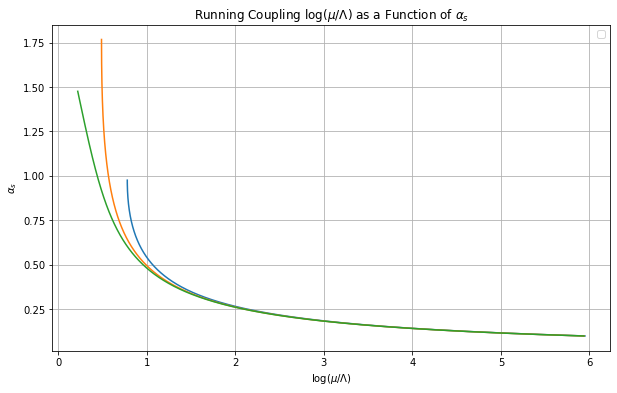

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_vals_restricted_1, x_vals_restricted_1)
plt.plot(y_vals_restricted_2, x_vals_restricted_2)
plt.plot(y_vals_restricted_3, x_vals_restricted_3)
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

### rescale:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


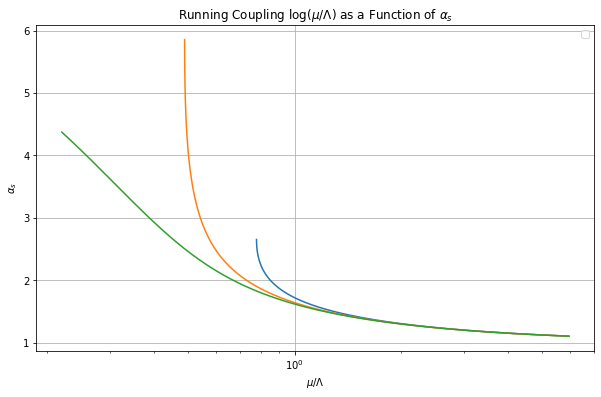

In [18]:
# Converting log(mu/Lambda) values back to mu/Lambda
x_vals_restricted_new_1 = np.exp(x_vals_restricted_1)
x_vals_restricted_new_2 = np.exp(x_vals_restricted_2)
x_vals_restricted_new_3 = np.exp(x_vals_restricted_3)

plt.figure(figsize=(10, 6))
plt.plot(y_vals_restricted_1, x_vals_restricted_new_1)
plt.plot(y_vals_restricted_2, x_vals_restricted_new_2)
plt.plot(y_vals_restricted_3, x_vals_restricted_new_3)
plt.xscale('log')
plt.xlabel("$\\mu/\\Lambda$")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

### Other numerical method (success?):

In [6]:
np_linspace_start = 0
np_linspace_end = 5

# Assign numerical values to Beta0 and Beta1
Beta0_val = beta0(3,3)
Beta1_val = beta1(3,3)
Beta2_val = beta2(3,3)
Beta3_val = beta3(3,3)

In [7]:
import numpy as np

def f1(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return (1/(2 * Beta0_val * x)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * x) + \
            (x/(2 * Beta0_val)) * (Beta2_val/Beta0_val - (Beta1_val/Beta0_val)**2) + \
            (x**2) / (4 * Beta0_val) * (Beta3_val/Beta0_val - (Beta1_val/Beta0_val)**3 - \
                                        2 * ((Beta1_val * Beta2_val)/(Beta0_val**2) - (Beta1_val/Beta0_val)**3))


from scipy.optimize import fsolve

def inverse_f1(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess=2):
    equation_to_solve = lambda x: f1(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]


# Example usage
y_value = 0.1838736  # Value for which you want to find the inverse
x_value = inverse_f1(y_value, Beta0_val, Beta1_val, Beta2_val, Beta3_val)
print(f"The inverse of f(x) at y = {y_value} is approximately x = {x_value}")


The inverse of f(x) at y = 0.1838736 is approximately x = 0.9748006334144889


/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


/tmp/ipykernel_4685/949943551.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  x_values_1 = [inverse_f1(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val,1/(1000*y)) for y in y_values_1]
/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


0.05


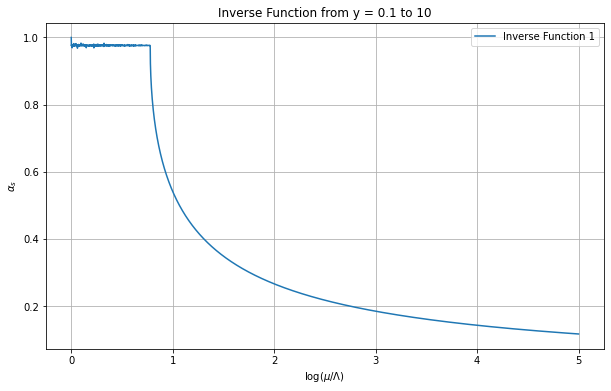

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import fsolve

def inverse_f1(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: f1(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for y values
y_values_1 = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 500 points between 0.1 and 10


# Compute the inverse for each y value
x_values_1 = [inverse_f1(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val,1/(1000*y)) for y in y_values_1]
print(inverse_f1(90, Beta0_val, Beta1_val, Beta2_val, Beta3_val,0.05))

plt.figure(figsize=(10, 6))
plt.plot(y_values_1, x_values_1, label='Inverse Function 1')
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title('Inverse Function from y = 0.1 to 10')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import numpy as np

def f2(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return 1 / (2 * Beta0_val * x) + (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val)


from scipy.optimize import fsolve

def inverse_f2(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess=2):
    equation_to_solve = lambda x: f2(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]


# Example usage
y_value = 0.1838736  # Value for which you want to find the inverse
x_value = inverse_f2(y_value, Beta0_val, Beta1_val, Beta2_val, Beta3_val)
print(f"The inverse of f(x) at y = {y_value} is approximately x = {x_value}")


The inverse of f(x) at y = 0.1838736 is approximately x = 2.0


0.05


/tmp/ipykernel_4685/1482507821.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  x_values_2 = [inverse_f2(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1/(1000*y)) for y in y_values_2]


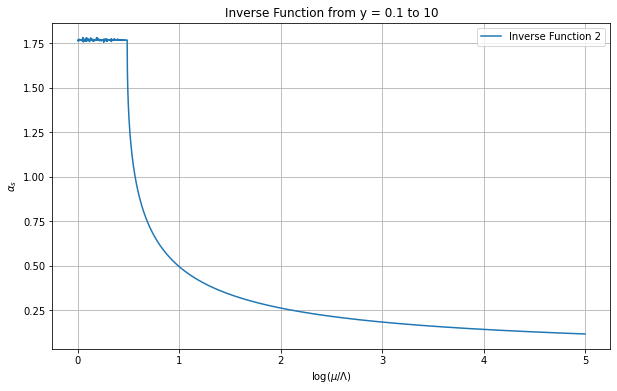

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import fsolve

def inverse_f2(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: f2(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for y values
y_values_2 = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 500 points between 0.1 and 10


# Compute the inverse for each y value
x_values_2 = [inverse_f2(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1/(1000*y)) for y in y_values_2]
print(inverse_f2(90, Beta0_val, Beta1_val, Beta2_val, Beta3_val,0.05))

plt.figure(figsize=(10, 6))
plt.plot(y_values_2, x_values_2, label='Inverse Function 2')
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title('Inverse Function from y = 0.1 to 10')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np

def f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return 1 / (2 * Beta0_val * x) + (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val) - \
            (Beta1_val / Beta0_val) / (2 * Beta0_val) * (Beta1_val * x / Beta0_val)**2


from scipy.optimize import fsolve

def inverse_f3(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess=2):
    equation_to_solve = lambda x: f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]


# Example usage
y_value = 0.1838736  # Value for which you want to find the inverse
x_value = inverse_f3(y_value, Beta0_val, Beta1_val, Beta2_val, Beta3_val)
print(f"The inverse of f(x) at y = {y_value} is approximately x = {x_value}")


The inverse of f(x) at y = 0.1838736 is approximately x = 1.5590245133379834


/tmp/ipykernel_17391/4248278341.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  x_values_3 = [inverse_f3(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val,1/(1000*y)) for y in y_values_3]
/tmp/ipykernel_17391/2462978428.py:6: RuntimeWarning: invalid value encountered in subtract
  return 1 / (2 * Beta0_val * x) + (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val) - \


0.05


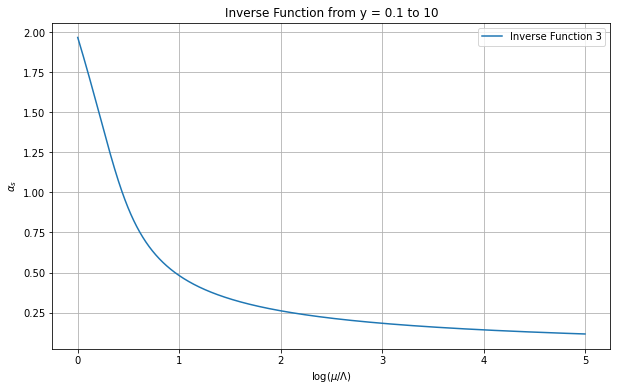

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import fsolve

def inverse_f3(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for y values
y_values_3 = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.1 and 10

# Compute the inverse for each y value
x_values_3 = [inverse_f3(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val,1/(1000*y)) for y in y_values_3]
print(inverse_f3(90, Beta0_val, Beta1_val, Beta2_val, Beta3_val,0.05))

plt.figure(figsize=(10, 6))
plt.plot(y_values_3, x_values_3, label='Inverse Function 3')
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title('Inverse Function from y = 0.1 to 10')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4549/3038520324.py:14: RuntimeWarning: overflow encountered in exp
  equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
/tmp/ipykernel_4549/3038520324.py:14: RuntimeWarning: overflow encountered in divide
  equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
/tmp/ipykernel_4549/3038520324.py:14: RuntimeWarning: divide by zero encountered in divide
  equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)


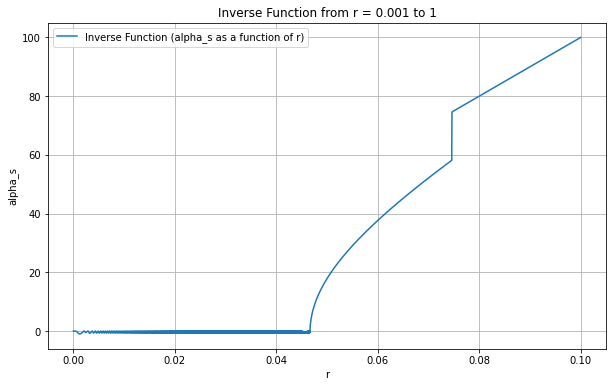

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Dummy function f3 and dummy Beta values for demonstration purposes
def f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return 1 / (2 * Beta0_val * x) + (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val) - \
           (Beta1_val / Beta0_val) / (2 * Beta0_val) * (Beta1_val * x / Beta0_val)**2

# Define the inverse function
def inverse_f3(log_mu_over_Lambda, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for r values (inverse of mu/Lambda)
r_values = np.linspace(np_linspace_start, 0.1, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
x_values = [inverse_f3(r, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1000*r) for r in r_values]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(r_values, x_values, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()


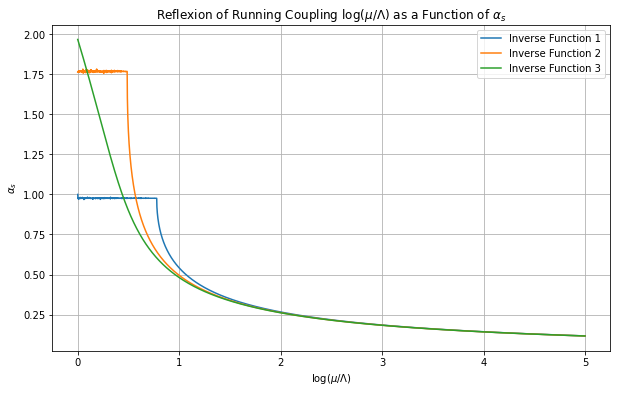

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_values_1, x_values_1, label='Inverse Function 1')
plt.plot(y_values_2, x_values_2, label='Inverse Function 2')
plt.plot(y_values_3, x_values_3, label='Inverse Function 3')
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Reflexion of Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

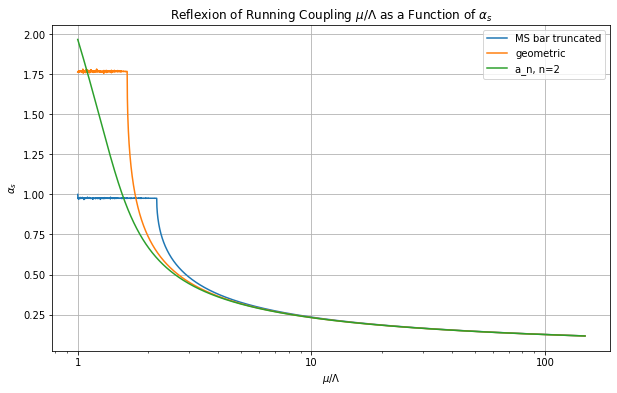

In [25]:
import matplotlib.ticker as ticker

# Converting log(mu/Lambda) values back to mu/Lambda
y_values_new_1 = np.exp(y_values_1)
y_values_new_2 = np.exp(y_values_2)
y_values_new_3 = np.exp(y_values_3)

plt.figure(figsize=(10, 6))
plt.plot(y_values_new_1, x_values_1, label='MS bar truncated')
plt.plot(y_values_new_2, x_values_2, label='geometric')
plt.plot(y_values_new_3, x_values_3, label='a_n, n=2')

plt.xscale('log')
# Customize x-axis to use plain format (non-scientific notation)
formatter = ticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y))
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel("$\\mu/\\Lambda$")
plt.ylabel("$\\alpha_s$")
plt.title("Reflexion of Running Coupling $\\mu/\\Lambda$ as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

### Alpha_s(r) ??

In [6]:
np_linspace_start = 0
np_linspace_end = 10

# Assign numerical values to Beta0 and Beta1
Beta0_val = beta0(3,3)
Beta1_val = beta1(3,3)
Beta2_val = beta2(3,3)
Beta3_val = beta3(3,3)

/tmp/ipykernel_4549/1917887162.py:16: RuntimeWarning: overflow encountered in exp
  equation_to_solve = lambda x: 1/np.exp(f1(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)


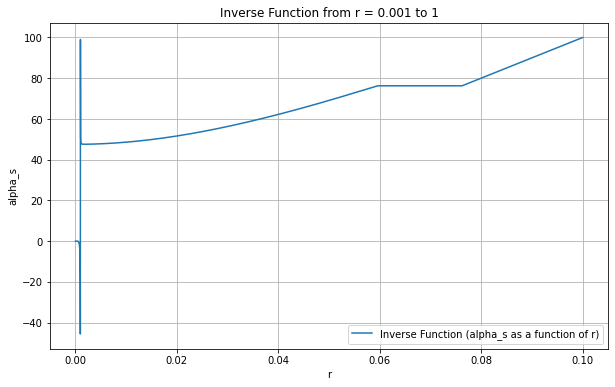

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Dummy function f3 and dummy Beta values for demonstration purposes
def f1(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return (1/(2 * Beta0_val * x)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * x) + \
            (x/(2 * Beta0_val)) * (Beta2_val/Beta0_val - (Beta1_val/Beta0_val)**2) + \
            (x**2) / (4 * Beta0_val) * (Beta3_val/Beta0_val - (Beta1_val/Beta0_val)**3 - \
                                        2 * ((Beta1_val * Beta2_val)/(Beta0_val**2) - (Beta1_val/Beta0_val)**3))

# Define the inverse function
def inverse_f1(log_mu_over_Lambda, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: 1/np.exp(f1(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for r values (inverse of mu/Lambda)
r_values_1 = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
x_values_1 = [inverse_f1(r, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1000*r) for r in r_values_1]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(r_values_1, x_values_1, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4849/3234295386.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  x_values_2 = [inverse_f2(r, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1/(1000*r)) for r in r_values_2]
/tmp/ipykernel_4849/3234295386.py:14: RuntimeWarning: overflow encountered in exp
  equation_to_solve = lambda x: 1/np.exp(f2(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)


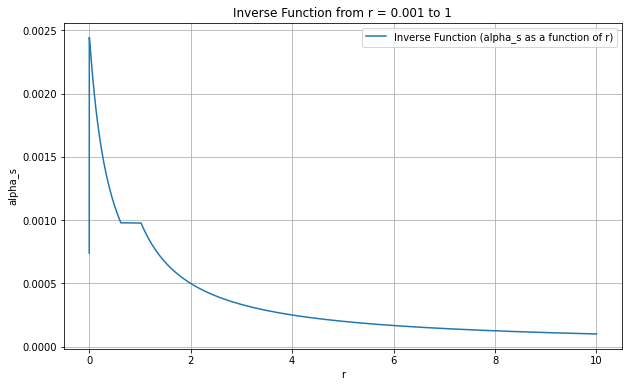

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Dummy function f3 and dummy Beta values for demonstration purposes
def f2(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return 1 / (2 * Beta0_val * x) + (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val)


# Define the inverse function
def inverse_f2(log_mu_over_Lambda, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: 1/np.exp(f2(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for r values (inverse of mu/Lambda)
r_values_2 = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
x_values_2 = [inverse_f2(r, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1/(1000*r)) for r in r_values_2]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(r_values_2, x_values_2, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4849/72068494.py:14: RuntimeWarning: overflow encountered in exp
  equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
/tmp/ipykernel_4849/72068494.py:14: RuntimeWarning: overflow encountered in divide
  equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
/tmp/ipykernel_4849/72068494.py:14: RuntimeWarning: divide by zero encountered in divide
  equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)


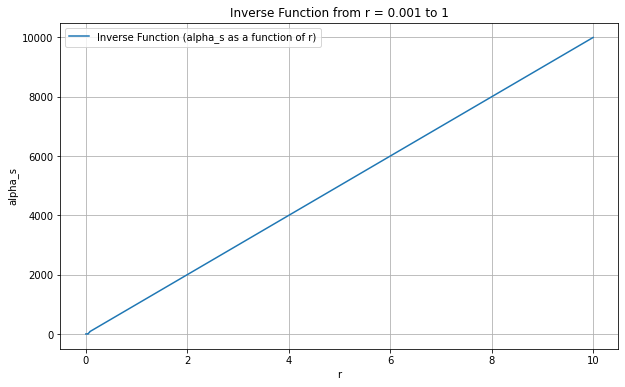

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Dummy function f3 and dummy Beta values for demonstration purposes
def f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return 1 / (2 * Beta0_val * x) + (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val) - \
           (Beta1_val / Beta0_val) / (2 * Beta0_val) * (Beta1_val * x / Beta0_val)**2

# Define the inverse function
def inverse_f3(log_mu_over_Lambda, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: 1/np.exp(f3(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - log_mu_over_Lambda)
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for r values (inverse of mu/Lambda)
r_values_3 = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
x_values_3 = [inverse_f3(r, Beta0_val, Beta1_val, Beta2_val, Beta3_val, 1000*r) for r in r_values_3]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(r_values_3, x_values_3, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()


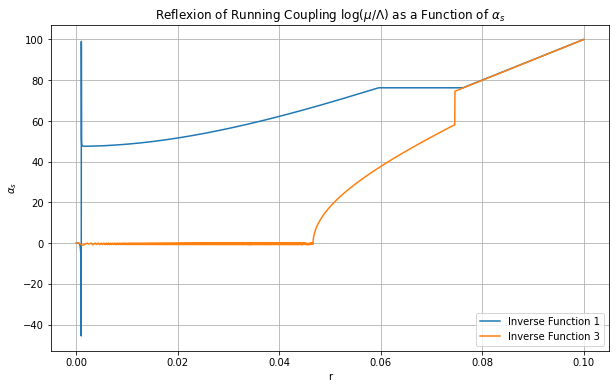

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(r_values_1, x_values_1, label='Inverse Function 1')
#plt.plot(r_values_2, x_values_2, label='Inverse Function 2')
plt.plot(r_values_3, x_values_3, label='Inverse Function 3')
plt.xlabel("r")
plt.ylabel("$\\alpha_s$")
plt.title("Reflexion of Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_4849/2339418035.py:5: RuntimeWarning: divide by zero encountered in divide
  return (1/(2 * Beta0_val * alpha)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * alpha)+ \
/tmp/ipykernel_4849/2339418035.py:5: RuntimeWarning: divide by zero encountered in log
  return (1/(2 * Beta0_val * alpha)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * alpha)+ \
/tmp/ipykernel_4849/2339418035.py:5: RuntimeWarning: invalid value encountered in add
  return (1/(2 * Beta0_val * alpha)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * alpha)+ \
/tmp/ipykernel_4849/2339418035.py:12: RuntimeWarning: divide by zero encountered in log
  equation_to_solve = lambda alpha: lmL(alpha, Beta0_val, Beta1_val, Beta2_val, Beta3_val) + np.log(rLambda)
/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jac

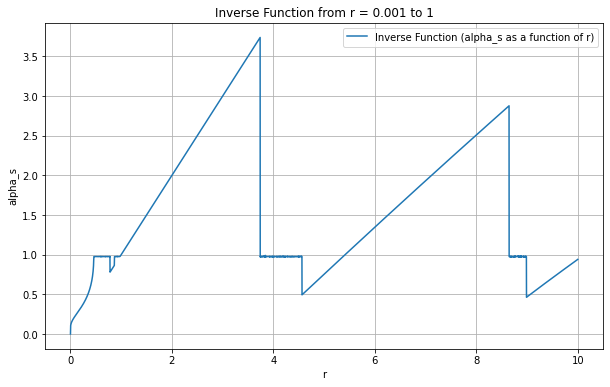

In [11]:
import numpy as np
from scipy.optimize import fsolve

def lmL(alpha, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    return (1/(2 * Beta0_val * alpha)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * alpha)+ \
            (alpha/(2 * Beta0_val)) * (Beta2_val/Beta0_val - (Beta1_val/Beta0_val)**2) + \
            (alpha**2) / (4 * Beta0_val) * (Beta3_val/Beta0_val - (Beta1_val/Beta0_val)**3 - \
                                        2 * ((Beta1_val * Beta2_val)/(Beta0_val**2) - (Beta1_val/Beta0_val)**3))

def alpha_rLambda(rLambda, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    # Define the equation to solve: lmL(alpha) - (-log(rLambda)) = 0
    equation_to_solve = lambda alpha: lmL(alpha, Beta0_val, Beta1_val, Beta2_val, Beta3_val) + np.log(rLambda)
    alpha_value = fsolve(equation_to_solve, guess)
    return alpha_value[0]

# Example usage
#rLambda_value = 0.5  # Example value for rLambda
#alpha_value = alpha_rLambda(rLambda_value, Beta0_val, Beta1_val, guess=0.1)
#print(f"The value of alpha for rLambda = {rLambda_value} is approximately alpha = {alpha_value}")

# Range for r values (inverse of mu/Lambda)
rLambda_value = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
alpha_value = [alpha_rLambda(r, Beta0_val, Beta1_val, Beta2_val, Beta3_val, r) for r in rLambda_value]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(rLambda_value, alpha_value, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()



/tmp/ipykernel_4549/2456170989.py:5: RuntimeWarning: divide by zero encountered in divide
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val)
/tmp/ipykernel_4549/2456170989.py:5: RuntimeWarning: divide by zero encountered in log
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val)
/tmp/ipykernel_4549/2456170989.py:5: RuntimeWarning: invalid value encountered in add
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val)
/tmp/ipykernel_4549/2456170989.py:9: RuntimeWarning: divide by zero encountered in log
  equation_to_solve = lambda alpha: lmL(alpha, Beta0_val, Beta1_val) + np.log(rLambda)
/tmp/ipykernel_4549/2456170989.py:5: RuntimeWarning: invalid value encountered in log
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val)


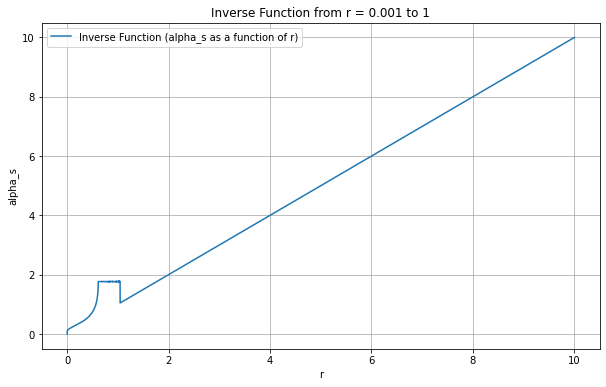

In [46]:
import numpy as np
from scipy.optimize import fsolve

def lmL(alpha, Beta0_val, Beta1_val):
    return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val)

def alpha_rLambda(rLambda, Beta0_val, Beta1_val, guess):
    # Define the equation to solve: lmL(alpha) - (-log(rLambda)) = 0
    equation_to_solve = lambda alpha: lmL(alpha, Beta0_val, Beta1_val) + np.log(rLambda)
    alpha_value = fsolve(equation_to_solve, guess)
    return alpha_value[0]

# Example usage
#rLambda_value = 0.5  # Example value for rLambda
#alpha_value = alpha_rLambda(rLambda_value, Beta0_val, Beta1_val, guess=0.1)
#print(f"The value of alpha for rLambda = {rLambda_value} is approximately alpha = {alpha_value}")

# Range for r values (inverse of mu/Lambda)
rLambda_value = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
alpha_value = [alpha_rLambda(r, Beta0_val, Beta1_val, r) for r in rLambda_value]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(rLambda_value, alpha_value, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()



/tmp/ipykernel_4549/75430655.py:5: RuntimeWarning: divide by zero encountered in divide
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val) - \
/tmp/ipykernel_4549/75430655.py:5: RuntimeWarning: divide by zero encountered in log
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val) - \
/tmp/ipykernel_4549/75430655.py:5: RuntimeWarning: invalid value encountered in add
  return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val) - \
/tmp/ipykernel_4549/75430655.py:10: RuntimeWarning: divide by zero encountered in log
  equation_to_solve = lambda alpha: lmL(alpha, Beta0_val, Beta1_val) + np.log(rLambda)


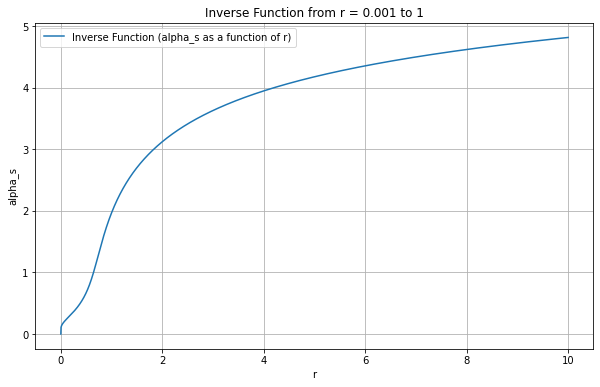

In [47]:
import numpy as np
from scipy.optimize import fsolve

def lmL(alpha, Beta0_val, Beta1_val):
    return 1 / (2 * Beta0_val * alpha) + (Beta1_val / Beta0_val) * np.log(Beta0_val * alpha) / (2 * Beta0_val) - \
           (Beta1_val / Beta0_val) / (2 * Beta0_val) * (Beta1_val * alpha / Beta0_val)**2

def alpha_rLambda(rLambda, Beta0_val, Beta1_val, guess):
    # Define the equation to solve: lmL(alpha) - (-log(rLambda)) = 0
    equation_to_solve = lambda alpha: lmL(alpha, Beta0_val, Beta1_val) + np.log(rLambda)
    alpha_value = fsolve(equation_to_solve, guess)
    return alpha_value[0]

# Example usage
#rLambda_value = 0.5  # Example value for rLambda
#alpha_value = alpha_rLambda(rLambda_value, Beta0_val, Beta1_val, guess=0.1)
#print(f"The value of alpha for rLambda = {rLambda_value} is approximately alpha = {alpha_value}")

# Range for r values (inverse of mu/Lambda)
rLambda_value = np.linspace(np_linspace_start, np_linspace_end, 5000)  # 5000 points between 0.001 and 1

# Compute the inverse for each log(mu/Lambda) value
alpha_value = [alpha_rLambda(r, Beta0_val, Beta1_val, r) for r in rLambda_value]

# Plot alpha_s as a function of r
plt.figure(figsize=(10, 6))
plt.plot(rLambda_value, alpha_value, label='Inverse Function (alpha_s as a function of r)')
plt.xlabel("r")
plt.ylabel("alpha_s")
plt.title('Inverse Function from r = 0.001 to 1')
plt.legend()
plt.grid(True)
plt.show()



## Matrix Operations: 

In [28]:
from sympy import Matrix
from sympy import symbols, log, series


# Example of defining a matrix
SchemeMx = Matrix([[1, 0, 0, 0], 
                   [0, 1, 0, 0], 
                   [Beta2/Beta0, 0, 1, 0],  # eta2, eta0 are symbols like Beta0
                   [Beta3/(2 * Beta0) - Beta3/2, 2 * Beta2/Beta0 - 2 * Beta2/Beta0, 0, 1]])
print(SchemeMx)
# Example of matrix multiplication
a = symbols('a0:4')  # a sequence of symbols a0, a1, a2, a3
result = SchemeMx * Matrix(a)
print(result)
print(a)

Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [Beta2/Beta0, 0, 1, 0], [-Beta3/2 + Beta3/(2*Beta0), 0, 0, 1]])
Matrix([[a0], [a1], [a2 + Beta2*a0/Beta0], [a0*(-Beta3/2 + Beta3/(2*Beta0)) + a3]])
(a0, a1, a2, a3)


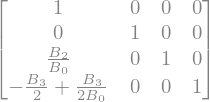

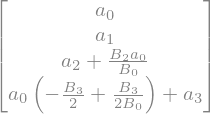

In [25]:
from sympy.interactive import init_printing
init_printing(use_unicode=True)


display(SchemeMx)
display(result)

# Running Coefficients and Static Energy:

### Define the symbolic variables:

In [26]:
from sympy import symbols, log, series

s = symbols('s')
a0, a1, a2, a3 = symbols('a0 a1 a2 a3')


### Define a function for Static Energy in Position Space:

In [27]:
def v(s, order):
    if order == 0:
        return a0
    elif order == 1:
        return a1 + 2 * a0 * beta0 * log(s)
    elif order == 2:
        return a2 + 2 * (2 * a1 * beta0 + a0 * beta1) * log(s) + a0 * (2 * beta0 * log(s))**2
    # Add more cases for higher orders
    else:
        return None
